# Student Result Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
#drop unnamed column
df=df.drop("Unnamed: 0", axis=1)

### Gender Distribution

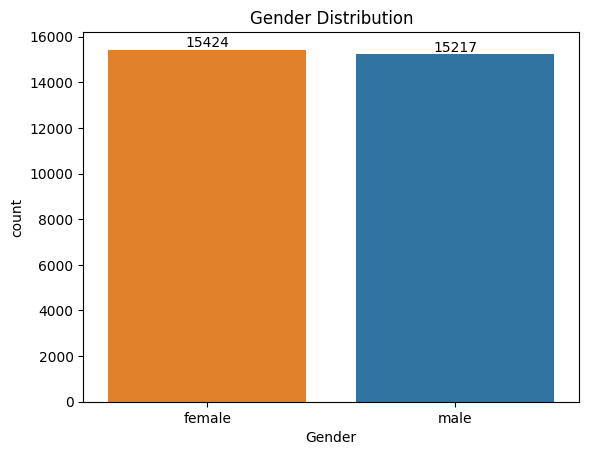

In [8]:
# Define colors for each gender
colors = [ '#ff7f0e','#1f77b4']  # Blue for Male, Orange for Female

ax=sns.countplot(x='Gender',data=df,hue='Gender', palette=colors)
plt.title("Gender Distribution")
for bars in ax.containers:
    ax.bar_label(bars)

*The number of female is greater than the number of male*

### How much Parents Education impact on scores

In [9]:
gb_pe=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb_pe

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


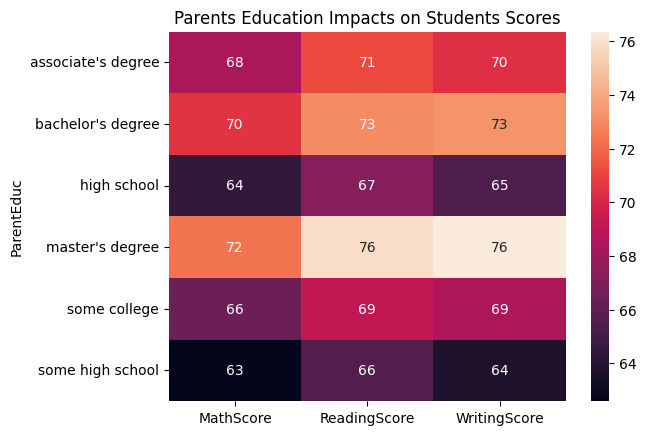

In [10]:
sns.heatmap(gb_pe,annot=True)
plt.title("Parents Education Impacts on Students Scores");

*On the basis of above Chart we concluded that education of Parent has a good impact on Scores*

### How much Parents Marital Status impact on scores

In [11]:
gb_pms=df.groupby("ParentMaritalStatus").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb_pms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


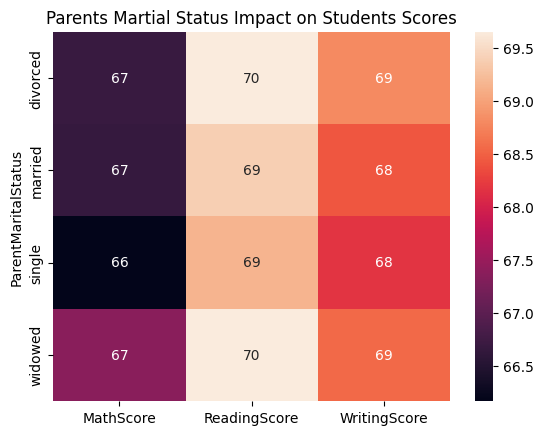

In [12]:
sns.heatmap(gb_pms,annot=True)
plt.title("Parents Martial Status Impact on Students Scores");

*On the basis of above Chart we concluded that Marital Status of Parent has a no/neligible impact on Scores*

### Student Practicing Sports impact on scores

In [13]:
gb_practicing_sport=df.groupby("PracticeSport").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb_practicing_sport

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


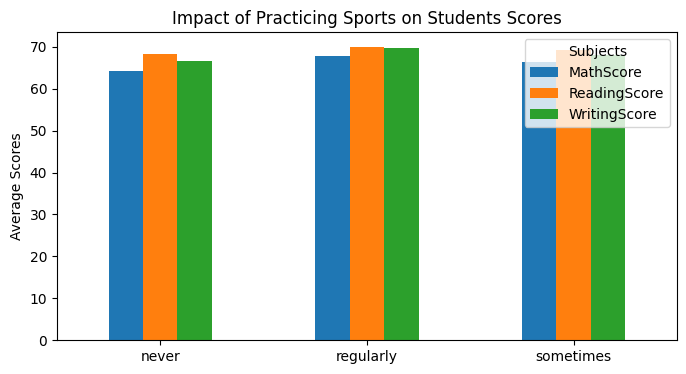

In [14]:
# Plotting the grouped data
gb_practicing_sport.plot(kind='bar', figsize=(8, 4))
plt.title("Impact of Practicing Sports on Students Scores")
plt.xlabel("")
plt.ylabel("Average Scores")
plt.legend(title="Subjects")
plt.xticks(rotation=0)
plt.show()

*On the basis of above Chart we concluded that Regularly Practing sports has a litle good impact on Scores*

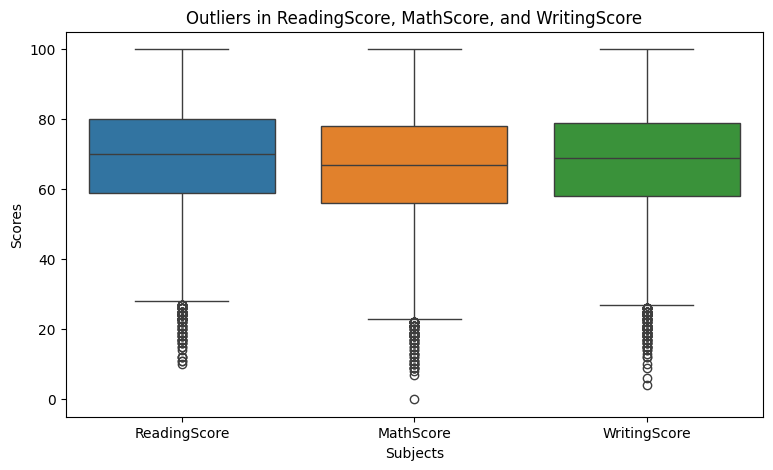

In [15]:
plt.figure(figsize=(9, 5))

# Creating box plots for each score column
sns.boxplot(data=df[['ReadingScore', 'MathScore', 'WritingScore']])

# Adding title and labels
plt.title("Outliers in ReadingScore, MathScore, and WritingScore")
plt.xlabel("Subjects")
plt.ylabel("Scores")

# Show the plot
plt.show()


*We conclude that through this graph most of the students are weak in Math Subject* 

### Distribution of Ethnic Group

In [16]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

Every Group Values are:  [2219, 5826, 9212, 7503, 4041]


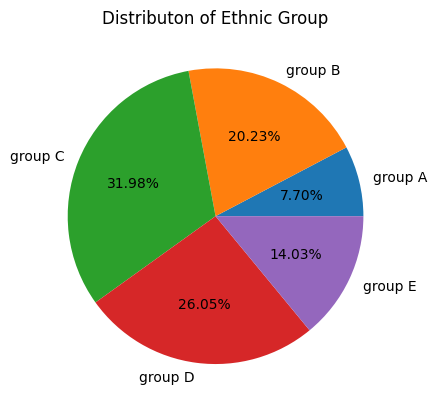

In [17]:
groupA = df.loc[(df['EthnicGroup']=="group A")].count()
groupB = df.loc[(df['EthnicGroup']=="group B")].count()
groupC = df.loc[(df['EthnicGroup']=="group C")].count()
groupD = df.loc[(df['EthnicGroup']=="group D")].count()
groupE = df.loc[(df['EthnicGroup']=="group E")].count()
'''
groupA  Counting non-null values for each column where 'EthnicGroup' is "group A"
groupA['EthnicGroup'] Count of non-null values for each column in 'group A' 
'''
l=['group A', 'group B', 'group C', 'group D', 'group E']
my_list=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
print("Every Group Values are: ",my_list)
plt.title("Distributon of Ethnic Group")
plt.pie(my_list, labels=l,autopct="%1.2f%%");


*We conclude that Group C has larger Ethnic group than others*

### Student Weekly Study Hours impact on scores

In [18]:
gb_WekklyStudyHours=df.groupby("WklyStudyHours").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb_WekklyStudyHours

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


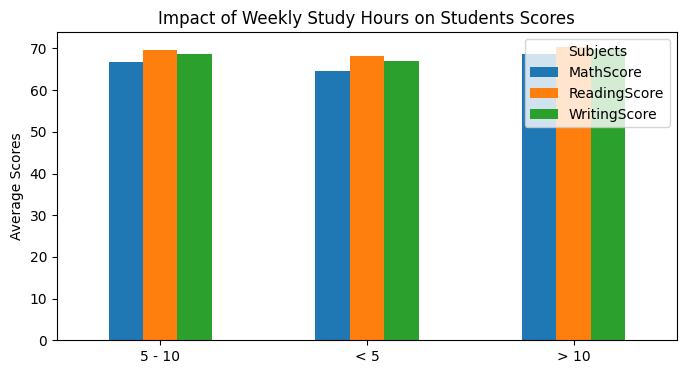

In [19]:
# Plotting the grouped data
gb_WekklyStudyHours.plot(kind='bar', figsize=(8, 4))
plt.title("Impact of Weekly Study Hours on Students Scores")
plt.xlabel("")
plt.ylabel("Average Scores")
plt.legend(title="Subjects")
plt.xticks(rotation=0)
plt.show()

*On the basis of above Chart we concluded that greater than 10 hours weekly study  has a much good impact on Scores*

### Conclusion

The analysis identifies parental education and weekly study hours as the most significant factors affecting test scores, with students studying over 10 hours weekly showing notable improvement. Additionally, regular sports participation contributes positively to performance. Interactions between these features, particularly between parental education and study habits, suggest that a supportive environment combined with dedicated study can enhance academic outcomes. Understanding these dynamics is essential for implementing effective educational strategies.